
# Класифікація та сегментація зображень за допомогою HuggingFace

У цьому ноутбуці ми розглянемо приклади використання бібліотеки HuggingFace для вирішення задач класифікації та сегментації зображень.
Ми використаємо такі моделі:
- **Vision Transformer (ViT)** для класифікації зображень.
- **DETR (DEtection TRansformer)** для сегментації зображень.



## Класифікація зображень

Для класифікації ми використаємо модель Vision Transformer (ViT), яка була попередньо навчена на датасеті ImageNet.


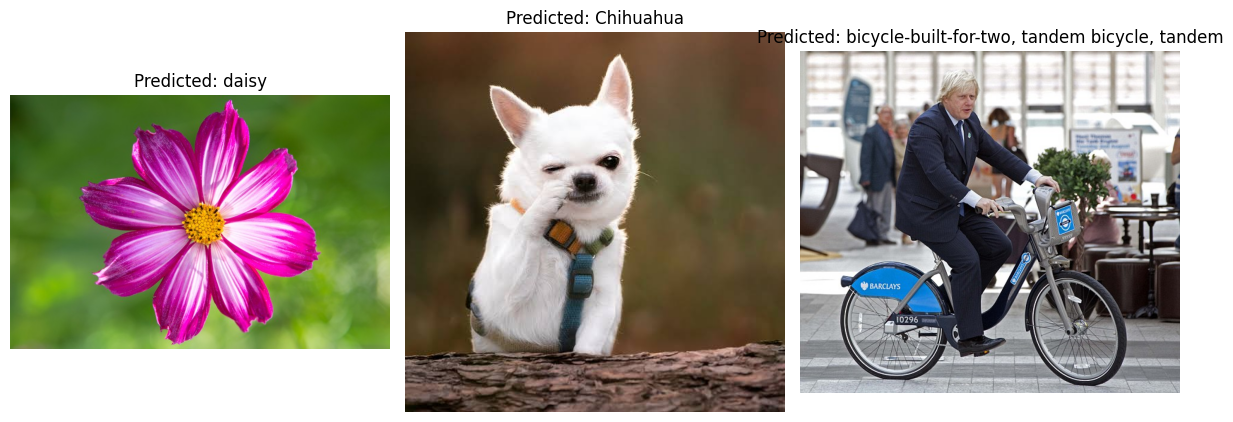

In [6]:
from transformers import ViTForImageClassification, ViTFeatureExtractor
from PIL import Image
import torch
import matplotlib.pyplot as plt

# Завантаження моделі та екстрактора
model_name = "google/vit-base-patch16-224"
model = ViTForImageClassification.from_pretrained(model_name)
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)

# Список зображень
image_paths = ["001.png", "002.png", "003.png"]

# Результати класифікації
predictions = []

# Обробка кожного зображення
for image_path in image_paths:
    # Завантаження локального зображення
    image = Image.open(image_path)

    # Перетворення зображення у формат RGB (на випадок, якщо воно ч/б або має альфа-канал)
    if image.mode != "RGB":
        image = image.convert("RGB")

    # Попередня обробка зображення
    inputs = feature_extractor(images=image, return_tensors="pt")

    # Передбачення
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = logits.argmax(-1).item()

    # Отримання метки класу
    labels = model.config.id2label
    predictions.append((image, labels[predicted_class]))

# Виведення зображень з підписами
fig, axes = plt.subplots(1, len(predictions), figsize=(12, 6))
for ax, (image, label) in zip(axes, predictions):
    ax.imshow(image)
    ax.axis("off")
    ax.set_title(f"Predicted: {label}")
plt.tight_layout()
plt.show()



## Сегментація зображень

Для сегментації зображень ми використаємо модель DETR (DEtection TRansformer). Ця модель дозволяє знаходити об'єкти на зображенні та визначати їх межі.


Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


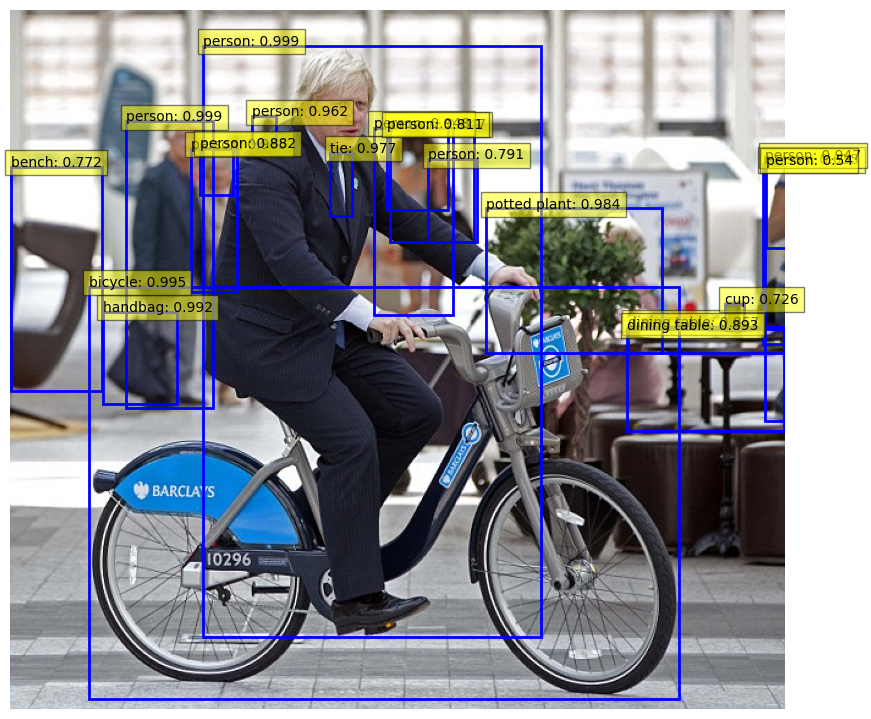

In [7]:
from transformers import DetrImageProcessor, DetrForObjectDetection
from PIL import Image
import matplotlib.pyplot as plt
import torch

# Завантаження моделі та процесора
model_name = "facebook/detr-resnet-50"
processor = DetrImageProcessor.from_pretrained(model_name)
model = DetrForObjectDetection.from_pretrained(model_name)

# Завантаження зображення
image = Image.open("003.png")

# Перетворення зображення у формат RGB (на випадок, якщо воно ч/б або має альфа-канал)
if image.mode != "RGB":
    image = image.convert("RGB")

# Попередня обробка зображення
inputs = processor(images=image, return_tensors="pt")

# Передбачення
outputs = model(**inputs)

# Візуалізація результатів
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.5)[0]

# Рендер результатів
plt.figure(figsize=(10, 10))
plt.imshow(image)
ax = plt.gca()

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    ax.add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                                fill=False, color='blue', linewidth=2))
    text = f"{model.config.id2label[label.item()]}: {round(score.item(), 3)}"
    ax.text(box[0], box[1], text, fontsize=10, bbox=dict(facecolor='yellow', alpha=0.5))
plt.axis('off')
plt.show()


### Висновки
У цьому ноутбуці продемонстровано використання моделей Vision Transformer (ViT) для класифікації та DETR (DEtection TRansformer) для сегментації зображень за допомогою бібліотеки HuggingFace. Використання попередньо навчених моделей значно спрощує виконання складних завдань комп'ютерного зору.